In [35]:
import pandas as pd
import numpy as np
import sklearn
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [40]:
used_car = pd.read_csv("./bmw.csv") # 한글 구사
used_car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df = used_car.copy()
encode_col = ['model', 'transmission', 'fuelType']
# label encoder 사용
for i in encode_col:
    LE = LabelEncoder()
    LE.fit(used_car[i])
    df[i] = LE.transform(used_car[i])
    
    Ohe = OneHotEncoder(sparse=False)
    Ohe.fit(np.array(df[i]).reshape(-1,1))
    df_name = pd.DataFrame(Ohe.transform(np.array(df[i]).reshape(-1,1)))
    df_name = df_name.set_axis([str(i) + '_' + str(j) for j in df[i].value_counts().index], axis='columns')
    df = pd.concat([df.drop(i, axis = 1), df_name], axis=1)
df

,year,price,mileage,tax,mpg,engineSize,model_2,model_0,model_1,model_4,...,model_12,model_20,transmission_2,transmission_0,transmission_1,fuelType_0,fuelType_4,fuelType_2,fuelType_3,fuelType_1
0,2014,11200,67068,125,57.6,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2018,27000,14827,145,42.8,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016,16000,62794,160,51.4,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2017,12750,26676,145,72.4,1.5,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2014,14500,39554,160,50.4,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10777,2016,14600,42947,125,60.1,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10778,2017,13100,25468,200,42.8,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10779,2014,9930,45000,30,64.2,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
label = df["price"]
data = df.drop('price',axis=1)

In [46]:
data_train, data_test, label_train, label_test = train_test_split(data, label) #75/25

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_train, label_train)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

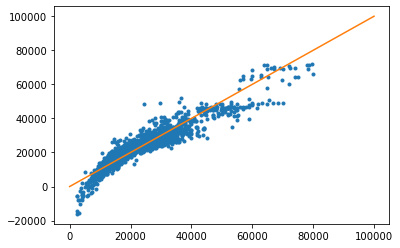

In [66]:
import matplotlib.pylab as plt

label_pred = model.predict(data_test)
plt.plot(label_test, label_pred,'.')

x=np.linspace(0,100000,100000)
y=x
plt.plot(x,y)
plt.show

In [67]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from lifelines.utils import concordance_index

mse = mean_squared_error(label_test, label_pred)
r2 = pearsonr(label_test,label_pred)[0]
p_val = pearsonr(label_test, label_pred)[1]
CI =  concordance_index(label_test, label_pred)

In [68]:
print('TestSet Performence Metric '+  ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
            + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])

TestSet Performence Metric  , MSE: 1412561 , Pearson Correlation: 0.94267 with p-value: 0.00E+00 , Concordance Index: 0.91227
